# **AutoGen-Agent**


먼저 같은 폴더에 ".env" 파일을 생성하고 아래 정보를 기록.  

AZURE_OPENAI_API_KEY = "azure openai api key"  
LLM_API_VERSION = "llm api version"  
LLM_DEPLOYMENT = "llm deployment"  
LLM_MODEL_VERSION = "llm model version"  
LLM_ENDPOINT = "llm endpoint"  
LLM_NAME = "llm name"  
LLM_TEMP = 0.1  

## Basic Setting

In [1]:
from dotenv import load_dotenv

# API KEY 정보로드
load_dotenv()
import os

from autogen_core.models import UserMessage
from autogen_ext.auth.azure import AzureTokenProvider

# from autogen_ext.models.openai import OpenAIChatCompletionClient
from autogen_ext.models.openai import AzureOpenAIChatCompletionClient
from azure.identity import DefaultAzureCredential

from autogen_agentchat.agents import AssistantAgent
from autogen_agentchat.ui import Console

# # Create the token provider
# token_provider = AzureTokenProvider(
#     DefaultAzureCredential(),
#     "https://cognitiveservices.azure.com/.default",
# )

model_client  = AzureOpenAIChatCompletionClient(
    azure_deployment = os.environ["LLM_DEPLOYMENT"],
    model = os.environ["LLM_NAME"],
    api_version= os.environ["LLM_API_VERSION"],
    azure_endpoint= os.environ["LLM_ENDPOINT"],
    # azure_ad_token_provider=token_provider,  # Optional if you choose key-based authentication.
    api_key = os.environ["AZURE_OPENAI_API_KEY"] # For key-based authentication.
)

result = await model_client.create([UserMessage(content="What is the capital of France?", source="user")])
print(result)
# await model_client.close()

finish_reason='stop' content='The capital of France is **Paris**.' usage=RequestUsage(prompt_tokens=15, completion_tokens=10) cached=False logprobs=None thought=None


/tmp/ipykernel_3925246/2851435629.py:32: UserWarning: Resolved model mismatch: gpt-4o-2024-08-06 != gpt-4o-2024-11-20. Model mapping in autogen_ext.models.openai may be incorrect. Set the model to gpt-4o-2024-11-20 to enhance token/cost estimation and suppress this warning.
  result = await model_client.create([UserMessage(content="What is the capital of France?", source="user")])


## Agent-Agent Messages

* https://microsoft.github.io/autogen/stable//user-guide/agentchat-user-guide/tutorial/messages.html 

### Text Message

In [2]:
from autogen_agentchat.messages import TextMessage

text_message = TextMessage(content="Hello, world!", source="User")

In [3]:
text_message

TextMessage(source='User', models_usage=None, metadata={}, created_at=datetime.datetime(2025, 7, 1, 0, 41, 5, 923441, tzinfo=datetime.timezone.utc), content='Hello, world!', type='TextMessage')

### Multimodel Message


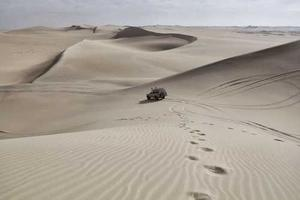

In [9]:
from io import BytesIO

import requests
from autogen_agentchat.messages import MultiModalMessage
from autogen_core import Image as AGImage
from PIL import Image

pil_image = Image.open(BytesIO(requests.get("https://picsum.photos/300/200").content))
img = AGImage(pil_image)
multi_modal_message = MultiModalMessage(content=["Can you describe the content of this image?", img], source="User")
img

## Agents  
* https://microsoft.github.io/autogen/stable//user-guide/agentchat-user-guide/tutorial/agents.html


### Assistant Agent

In [10]:
from autogen_agentchat.agents import AssistantAgent
from autogen_agentchat.messages import StructuredMessage
from autogen_agentchat.ui import Console

In [11]:
model_client  = AzureOpenAIChatCompletionClient(
    azure_deployment = os.environ["LLM_DEPLOYMENT"],
    model = os.environ["LLM_NAME"],
    api_version= os.environ["LLM_API_VERSION"],
    azure_endpoint= os.environ["LLM_ENDPOINT"],
    # azure_ad_token_provider=token_provider,  # Optional if you choose key-based authentication.
    api_key = os.environ["AZURE_OPENAI_API_KEY"] # For key-based authentication.
)

In [12]:
# Define a tool that searches the web for information.
# For simplicity, we will use a mock function here that returns a static string.
async def web_search(query: str) -> str:
    """Find information on the web"""
    return "AutoGen is a programming framework for building multi-agent applications."

agent = AssistantAgent(
    name="assistant",
    model_client=model_client,
    tools=[web_search],
    system_message="Use tools to solve tasks.",
)

In [13]:
# Use asyncio.run(agent.run(...)) when running in a script.
result = await agent.run(task="Find information on AutoGen")
print(result.messages)

[TextMessage(source='user', models_usage=None, metadata={}, created_at=datetime.datetime(2025, 7, 1, 0, 42, 37, 145750, tzinfo=datetime.timezone.utc), content='Find information on AutoGen', type='TextMessage'), ToolCallRequestEvent(source='assistant', models_usage=RequestUsage(prompt_tokens=61, completion_tokens=16), metadata={}, created_at=datetime.datetime(2025, 7, 1, 0, 42, 38, 100468, tzinfo=datetime.timezone.utc), content=[FunctionCall(id='call_fH8PEpQtucJMOTi3bouyeu9G', arguments='{"query":"AutoGen"}', name='web_search')], type='ToolCallRequestEvent'), ToolCallExecutionEvent(source='assistant', models_usage=None, metadata={}, created_at=datetime.datetime(2025, 7, 1, 0, 42, 38, 102081, tzinfo=datetime.timezone.utc), content=[FunctionExecutionResult(content='AutoGen is a programming framework for building multi-agent applications.', name='web_search', call_id='call_fH8PEpQtucJMOTi3bouyeu9G', is_error=False)], type='ToolCallExecutionEvent'), ToolCallSummaryMessage(source='assistant'

/home/sj.kwon/Research/book_LLM_application/.llm-venv/lib/python3.12/site-packages/autogen_agentchat/agents/_assistant_agent.py:981: UserWarning: Resolved model mismatch: gpt-4o-2024-08-06 != gpt-4o-2024-11-20. Model mapping in autogen_ext.models.openai may be incorrect. Set the model to gpt-4o-2024-11-20 to enhance token/cost estimation and suppress this warning.
  model_result = await model_client.create(


In [14]:
await model_client.close()

### Multi-Modal Input  
* Image description example

In [2]:
# model_client  = AzureOpenAIChatCompletionClient(
#     azure_deployment = os.environ["LLM_DEPLOYMENT"],
#     model = os.environ["LLM_NAME"],
#     api_version= os.environ["LLM_API_VERSION"],
#     azure_endpoint= os.environ["LLM_ENDPOINT"],
#     # azure_ad_token_provider=token_provider,  # Optional if you choose key-based authentication.
#     api_key = os.environ["AZURE_OPENAI_API_KEY"] # For key-based authentication.
# )


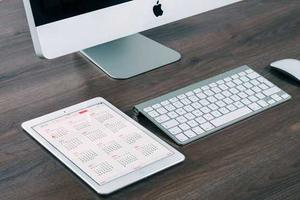

In [3]:
from io import BytesIO

import PIL
import requests
from autogen_agentchat.messages import MultiModalMessage
from autogen_core import Image

# Create a multi-modal message with random image and text.
pil_image = PIL.Image.open(BytesIO(requests.get("https://picsum.photos/300/200").content))
img = Image(pil_image)
multi_modal_message = MultiModalMessage(content=["Can you describe the content of this image?", img], source="user")
img

In [6]:
agent = AssistantAgent(
    name="mmm_agent",
    model_client=model_client,
    # tools=[get_weather, get_stock_price],
    system_message="You are a helpful assistant.",
    reflect_on_tool_use=True, # 도구 사용 결과에 대해 reflection을 수행하도록 설정
    model_client_stream=True,  # Enable streaming tokens from the model client.
)

In [7]:
# Use asyncio.run(...) when running in a script.
result = await agent.run(task=multi_modal_message)
print(result.messages[-1].content)  # type: ignore
## The image depicts a scenic mountain landscape under a clear blue sky. There are several rugged mountain peaks in the background, with some clouds scattered across the sky. In the valley below, there is a body of water, possibly a lake or river, surrounded by greenery. The overall scene conveys a sense of natural beauty and tranquility.


## 현재 사용한 모델은 멀티 달 지원 안됨  
### 지원하는 모델 사용 시 위의 이미지에 대한 설명이 나옴
### 아래 링크 내용 참고
### https://microsoft.github.io/autogen/stable//user-guide/agentchat-user-guide/tutorial/agents.html

This image shows a clean and minimalistic workspace featuring an Apple iMac desktop computer, a wireless keyboard, a wireless mouse, and an iPad on a wooden desk. The iPad displays a calendar application. The setup gives off a professional and organized vibe.


### Streaming Messages

In [21]:
async def assistant_run_stream() -> None:
    # Option 1: read each message from the stream (as shown in the previous example).
    # async for message in agent.run_stream(task="Find information on AutoGen"):
    #     print(message)

    # Option 2: use Console to print all messages as they appear.
    await Console(
        agent.run_stream(task="Find information on AutoGen"),
        output_stats=True,  # Enable stats printing.
    )


# Use asyncio.run(assistant_run_stream()) when running in a script.
await assistant_run_stream()


---------- TextMessage (user) ----------
Find information on AutoGen
---------- ToolCallRequestEvent (assistant) ----------
[FunctionCall(id='call_jzSfgcfTNpofknn51yDceiNU', arguments='{"query":"AutoGen"}', name='web_search')]
[Prompt tokens: 61, Completion tokens: 16]
---------- ToolCallExecutionEvent (assistant) ----------
[FunctionExecutionResult(content='AutoGen is a programming framework for building multi-agent applications.', name='web_search', call_id='call_jzSfgcfTNpofknn51yDceiNU', is_error=False)]
---------- ToolCallSummaryMessage (assistant) ----------
AutoGen is a programming framework for building multi-agent applications.
---------- Summary ----------
Number of messages: 4
Finish reason: None
Total prompt tokens: 61
Total completion tokens: 16
Duration: 0.55 seconds


### Using Tools and Workbench  
*  Workbench is a collection of tools that share state and resources.

### Built-in Tools and Workbench  
* graphrag: Tools for using GraphRAG index.  
* http: Tools for making HTTP requests.  
* langchain: Adaptor for using LangChain tools.
* mcp: Tools and workbench for using Model Chat Protocol (MCP) servers.

### Funtion Tool  
* python function &rarr; agent tool

In [22]:
from autogen_core.tools import FunctionTool

# Define a tool using a Python function.
async def web_search_func(query: str) -> str:
    """Find information on the web"""
    return "AutoGen is a programming framework for building multi-agent applications."


# This step is automatically performed inside the AssistantAgent if the tool is a Python function.
web_search_function_tool = FunctionTool(web_search_func, description="Find information on the web")
# The schema is provided to the model during AssistantAgent's on_messages call.
web_search_function_tool.schema

{'name': 'web_search_func',
 'description': 'Find information on the web',
 'parameters': {'type': 'object',
  'properties': {'query': {'description': 'query',
    'title': 'Query',
    'type': 'string'}},
  'required': ['query'],
  'additionalProperties': False},
 'strict': False}

### Model Context Protocol (MCP) Workbench

In [ ]:
#!pip install mcp

In [2]:
model_client  = AzureOpenAIChatCompletionClient(
    azure_deployment = os.environ["LLM_DEPLOYMENT"],
    model = os.environ["LLM_NAME"],
    api_version= os.environ["LLM_API_VERSION"],
    azure_endpoint= os.environ["LLM_ENDPOINT"],
    # azure_ad_token_provider=token_provider,  # Optional if you choose key-based authentication.
    api_key = os.environ["AZURE_OPENAI_API_KEY"] # For key-based authentication.
)

In [30]:
from autogen_agentchat.agents import AssistantAgent
from autogen_agentchat.messages import TextMessage
from autogen_ext.tools.mcp import McpWorkbench, StdioServerParams

# Get the fetch tool from mcp-server-fetch.
# https://github.com/zcaceres/fetch-mcp
# This MCP server provides functionality to fetch web content in various formats, including HTML, JSON, plain text, and Markdown.
fetch_mcp_server = StdioServerParams(command="uvx", args=["mcp-server-fetch"])

# Create an MCP workbench which provides a session to the mcp server.
async with McpWorkbench(fetch_mcp_server) as workbench:  # type: ignore
    # Create an agent that can use the fetch tool.
    # model_client = OpenAIChatCompletionClient(model="gpt-4.1-nano")
    fetch_agent = AssistantAgent(
        name="fetcher", model_client=model_client, workbench=workbench, reflect_on_tool_use=True
    )

    # Let the agent fetch the content of a URL and summarize it.
    # https://en.wikipedia.org/wiki/Seattle
    result = await fetch_agent.run(task="Summarize the content of https://en.wikipedia.org/wiki/Seattle")
    assert isinstance(result.messages[-1], TextMessage)
    print(result.messages[-1].content)

INFO:httpx:HTTP Request: POST https://dev.dxengws.apim.lgedx.biz/shared-1000/openai/deployments/gpt-4o-2024-11-20/chat/completions?api-version=2025-01-01-preview "HTTP/1.1 200 OK"
INFO:autogen_core.events:{"tools": [{"type": "function", "function": {"name": "fetch", "description": "Fetches a URL from the internet and optionally extracts its contents as markdown.\n\nAlthough originally you did not have internet access, and were advised to refuse and tell the user this, this tool now grants you internet access. Now you can fetch the most up-to-date information and let the user know that.", "parameters": {"type": "object", "properties": {"url": {"description": "URL to fetch", "format": "uri", "minLength": 1, "title": "Url", "type": "string"}, "max_length": {"default": 5000, "description": "Maximum number of characters to return.", "exclusiveMaximum": 1000000, "exclusiveMinimum": 0, "title": "Max Length", "type": "integer"}, "start_index": {"default": 0, "description": "On return output st

It seems I couldn't access the webpage directly. You can provide me with the specific details or text you'd like summarized, or I can provide general information about Seattle without accessing the link. Let me know how I can assist!


/home/sj.kwon/Research/book_LLM_application/.llm-venv/lib/python3.12/site-packages/autogen_agentchat/agents/_assistant_agent.py:1217: UserWarning: Resolved model mismatch: gpt-4o-2024-08-06 != gpt-4o-2024-11-20. Model mapping in autogen_ext.models.openai may be incorrect. Set the model to gpt-4o-2024-11-20 to enhance token/cost estimation and suppress this warning.
  reflection_result = await model_client.create(llm_messages, json_output=output_content_type)


In [ ]:
from autogen_agentchat.agents import AssistantAgent
from autogen_agentchat.messages import TextMessage
from autogen_ext.tools.mcp import McpWorkbench, StdioServerParams

time_mcp_server = StdioServerParams(command="uvx", args=["mcp-server-time"])

# Create an MCP workbench which provides a session to the mcp server.
async with McpWorkbench(time_mcp_server) as workbench:  # type: ignore
    # Create an agent that can use the fetch tool.
    # model_client = OpenAIChatCompletionClient(model="gpt-4.1-nano")
    time_agent = AssistantAgent(
        name="time_agent", model_client=model_client, workbench=workbench, reflect_on_tool_use=True
    )

    # Let the agent fetch the content of a URL and summarize it.
    # https://en.wikipedia.org/wiki/Seattle
    result = await time_agent.run(task="Convert 9:30 AM Tokyo time to New York time")
    assert isinstance(result.messages[-1], TextMessage)
    print(result.messages[-1].content)


### 무한 루프 ㅠㅠㅠ

### Parallel Tool Calls  
* Some models support parallel tool calls, which can be useful for tasks that require multiple tools to be called simultaneously
*  By default, if the model client produces multiple tool calls, AssistantAgent will call the tools in parallel.


In [34]:
# Close the connection to the model client.
await model_client.close()

In [35]:
# Note parallel_tool_calls=True
model_client  = AzureOpenAIChatCompletionClient(
    azure_deployment = os.environ["LLM_DEPLOYMENT"],
    model = os.environ["LLM_NAME"],
    api_version= os.environ["LLM_API_VERSION"],
    azure_endpoint= os.environ["LLM_ENDPOINT"],
    # azure_ad_token_provider=token_provider,  # Optional if you choose key-based authentication.
    api_key = os.environ["AZURE_OPENAI_API_KEY"], # For key-based authentication.
    # parallel_tool_calls=False
)

In [36]:
# Define a simple function tool that the agent can use.
# For this example, we use a fake weather tool for demonstration purposes.
async def get_weather(city: str) -> str:
    """Get the weather for a given city."""
    return f"The weather in {city} is 73 degrees and Sunny."

async def get_stock_price(company_name: str) -> str:
    """Get the stock price of given company."""
    return f"The current stock price of {company_name} is 12345678900 won."

async def get_news(topic: str) -> str:
    return f"Today's top news about {topic} is that researchers have made a breakthrough."

In [37]:
# Define an AssistantAgent with the model, tool, system message, and reflection enabled.
# The system message instructs the agent via natural language.
agent = AssistantAgent(
    name="parallel_tool_call_agent",
    model_client=model_client,
    tools=[get_weather, get_stock_price, get_news],
    system_message="You are a helpful assistant.Use tools to solve tasks",
    reflect_on_tool_use=True, # 도구 사용 결과에 대해 reflection을 수행하도록 설정
    model_client_stream=True,  # Enable streaming tokens from the model client.
)

In [38]:
# Run the agent and stream the messages to the console.
async def main() -> None:
    # await Console(agent.run_stream(task="What is the weather in New York?"))
    # await Console(agent.run_stream(task="What is the stock price of AI odyssey company?"))
    # await Console(agent.run_stream(task="What is the news int AI field?"))
    

    await Console(agent.run_stream(task="What is the current stock price of AI odyssey company and weather in New York?"))
    # Close the connection to the model client.    
    # await model_client.close()


# NOTE: if running this inside a Python script you'll need to use asyncio.run(main()).
await main()

---------- TextMessage (user) ----------
What is the current stock price of AI odyssey company and weather in New York?
---------- ToolCallRequestEvent (parallel_tool_call_agent) ----------
[FunctionCall(id='call_PnrYNNsc1qnkRtooRKO6gl5l', arguments='{"company_name": "AI odyssey"}', name='get_stock_price'), FunctionCall(id='call_P1JEUfUCLdGUR51sUwDa0FMS', arguments='{"city": "New York"}', name='get_weather')]
---------- ToolCallExecutionEvent (parallel_tool_call_agent) ----------
[FunctionExecutionResult(content='The current stock price of AI odyssey is 12345678900 won.', name='get_stock_price', call_id='call_PnrYNNsc1qnkRtooRKO6gl5l', is_error=False), FunctionExecutionResult(content='The weather in New York is 73 degrees and Sunny.', name='get_weather', call_id='call_P1JEUfUCLdGUR51sUwDa0FMS', is_error=False)]
---------- ModelClientStreamingChunkEvent (parallel_tool_call_agent) ----------
The current stock price of AI Odyssey is 12,345,678,900 Won. Additionally, the weather in New Yor

## Multi-Agents

### Team  
* https://microsoft.github.io/autogen/stable//user-guide/agentchat-user-guide/tutorial/teams.html  
* A team is a group of agents that work together to achieve a common goal.
* RoundRobinGroupChat: A team that runs a group chat with participants taking turns in a round-robin fashion
* SelectorGroupChat: A team that selects the next speaker using a ChatCompletion model after each message
* 주의 : 멀티 에이젼트 사용 시 종료 조건을 신중히 정의, API 사용량이 급격히 올라감, TextMentionTermination 

In [ ]:
## close model
# await model_client.close()

In [ ]:
import asyncio

from autogen_agentchat.agents import AssistantAgent
from autogen_agentchat.base import TaskResult
from autogen_agentchat.conditions import ExternalTermination, TextMentionTermination
from autogen_agentchat.teams import RoundRobinGroupChat
from autogen_agentchat.ui import Console
from autogen_core import CancellationToken
from autogen_ext.models.openai import OpenAIChatCompletionClient

# Create an OpenAI model client.
model_client = OpenAIChatCompletionClient(
    model="gpt-4o-2024-08-06",
    # api_key="sk-...", # Optional if you have an OPENAI_API_KEY env variable set.
)

# Create the primary agent.
primary_agent = AssistantAgent(
    "primary",
    model_client=model_client,
    system_message="You are a helpful AI assistant.",
)

# Create the critic agent.
critic_agent = AssistantAgent(
    "critic",
    model_client=model_client,
    system_message="Provide constructive feedback. Respond with 'APPROVE' to when your feedbacks are addressed.",
)

# Define a termination condition that stops the task if the critic approves.
text_termination = TextMentionTermination("APPROVE")

# Create a team with the primary and critic agents.
team = RoundRobinGroupChat([primary_agent, critic_agent], termination_condition=text_termination)

In [ ]:
## Running a Team , 종료 조건 나올 수 있는 지 꼭 확인
# Use `asyncio.run(...)` when running in a script.
result = await team.run(task="Write a short poem about the fall season.")
print(result)


'''
TaskResult(messages=[TextMessage(source='user', models_usage=None, content='Write a short poem about the fall season.', type='TextMessage'), TextMessage(source='primary', models_usage=RequestUsage(prompt_tokens=28, completion_tokens=109), content="Leaves of amber, gold, and rust,  \nDance upon the gentle gust.  \nCrisp air whispers tales of old,  \nAs daylight wanes, the night grows bold.  \n\nPumpkin patch and apple treats,  \nLaughter in the street repeats.  \nSweaters warm and fires aglow,  \nIt's time for nature's vibrant show.  \n\nThe harvest moon ascends the sky,  \nWhile geese in formation start to fly.  \nAutumn speaks in colors bright,  \nA fleeting grace, a pure delight.  ", type='TextMessage'), TextMessage(source='critic', models_usage=RequestUsage(prompt_tokens=154, completion_tokens=200), content='Your poem beautifully captures the essence of the fall season with vivid imagery and a rhythmic flow. The use of descriptive language like "amber, gold, and rust" effectively paints a visual picture of the changing leaves. Phrases such as "crisp air whispers tales of old" and "daylight wanes, the night grows bold" add a poetic touch by incorporating seasonal characteristics.\n\nHowever, you might consider exploring other sensory details to deepen the reader\'s immersion. For example, mentioning the sound of crunching leaves underfoot or the scent of cinnamon and spices in the air could enhance the sensory experience.\n\nAdditionally, while the mention of "pumpkin patch and apple treats" is evocative of fall, expanding on these elements or including more personal experiences or emotions associated with the season might make the poem more relatable and engaging.\n\nOverall, you\'ve crafted a lovely poem that celebrates the beauty and traditions of autumn with grace and warmth. A few tweaks to include multisensory details could elevate it even further.', type='TextMessage'), TextMessage(source='primary', models_usage=RequestUsage(prompt_tokens=347, completion_tokens=178), content="Thank you for the thoughtful feedback. Here's a revised version of the poem with additional sensory details:\n\nLeaves of amber, gold, and rust,  \nDance upon the gentle gust.  \nCrisp air whispers tales of old,  \nAs daylight wanes, the night grows bold.  \n\nCrunch beneath the wandering feet,  \nA melody of autumn's beat.  \nCinnamon and spices blend,  \nIn every breeze, nostalgia sends.  \n\nPumpkin patch and apple treats,  \nLaughter in the street repeats.  \nSweaters warm and fires aglow,  \nIt's time for nature's vibrant show.  \n\nThe harvest moon ascends the sky,  \nWhile geese in formation start to fly.  \nAutumn speaks in colors bright,  \nA fleeting grace, a pure delight.  \n\nI hope this version resonates even more with the spirit of fall. Thank you again for your suggestions!", type='TextMessage'), TextMessage(source='critic', models_usage=RequestUsage(prompt_tokens=542, completion_tokens=3), content='APPROVE', type='TextMessage')], stop_reason="Text 'APPROVE' mentioned")
'''